# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: **Caleb Sellinger**

### GitHub [HERE](https://github.com/crsellinger/web-scraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [52]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

# Caleb Sellinger
# Dr. Case
# CS44620
# 28 July 2025

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                 Version
----------------------- -----------
annotated-types         0.7.0
asttokens               3.0.0
beautifulsoup4          4.13.4
blis                    1.3.0
catalogue               2.0.10
certifi                 2025.7.14
charset-normalizer      3.4.2
click                   8.2.1
cloudpathlib            0.21.1
colorama                0.4.6
comm                    0.2.3
confection              0.1.5
contourpy               1.3.3
cycler                  0.12.1
cymem                   2.0.11
debugpy                 1.8.15
decorator               5.2.1
en_core_web_sm          3.8.0
executing               2.2.0
fonttools               4.59.0
idna                    3.10
ipykernel               6.30.0
ipython                 9.4.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
Jinja2                  3.1.6
joblib                  1.5.1
jupyter_client          8.6.3
jupyter_core            5.8.1
kiwisolver              1.4.8
langcodes           

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
response = requests.get("https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work")

# Note: response needs to be string
soup = BeautifulSoup(response.text, "html.parser")

# First article element is main content, so no need to parse further
article = soup.find('article')

# Storing content in pickle file
with open('content.pkl','wb') as file:
    pickle.dump(article.text, file)

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
# Aleady seached for article element and stored only the element in pickle file
# This is slightly less code, no need for get_text()
with open("content.pkl", "rb") as file:
    article = pickle.load(file)

print(article)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens and their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
# Spacy Pipeline
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")
doc = nlp(article)

# Remove whitespace/punctuation/stopwords
tokens = [
    word
    for word in doc
    if not (word.is_space or word.is_punct or word.is_stop or word.is_digit)
]

# Wrote this for loop first, then used list compehension above
# Will keep in for reference on writing list comprehension in future
###################################################################################
# Remove whitespace/punctuation/stopwords
# for word in doc:
#     if not (word.is_space or word.is_punct or word.is_stop or word.is_digit):
#         tokens.append(word)
###################################################################################

# Lower case
lower_tokens = [x.lower_ for x in tokens]

# Now that we have a list of tokens, we can determine frequency and commonality
# Counting frequency of words
freq = Counter(map(str,lower_tokens))
# Top 10 most common tokens put into a list
common_words = [f"{x}: {y}" for x, y in freq.most_common(5)]
print(f"Top 10 most common tokens:\n{common_words}")
# print(freq)

for i,n in freq.items():
    print(f"{i}:{n}")

Top 10 most common tokens:
['laser: 35', 'headlights: 19', 'headlight: 11', 'technology: 10', 'led: 10']
laser:35
headlights:19
work:2
comments:1
lewin:1
day:3
march:2
think:1
onward:1
automotive:6
technology:10
usually:1
thing:2
come:5
mind:3
engines:1
fuel:1
efficiency:3
switch:2
electric:1
power:3
mean:1
thousands:1
engineers:2
world:2
working:1
improve:1
state:2
art:1
lighting:4
sealed:2
beam:7
gave:1
way:4
modern:2
designs:3
regulations:1
loosened:1
bulbs:1
moved:2
simple:3
halogens:1
xenon:1
hids:1
recently:1
leds:6
new:3
scene:1
lasers:5
bwm:2
prototype:1
headlight:11
assemblies:1
undergoing:1
testing:1
image:2
brought:1
phrase:1
beams:5
firing:1
automobile:1
obviously:1
coherent:1
monochromatic:1
light:9
poor:1
illumination:2
outside:1
specific:1
spot:2
distance:1
away:1
thankfully:2
eyes:1
instead:1
consist:1
solid:1
diodes:2
mounted:1
inside:3
blue:1
fired:1
yellow:1
phosphor:3
similar:1
white:2
produces:1
powerful:2
vibrant:1
bounced:1
reflectors:1
road:2
built:2
benefits:2


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [21]:
# Lemmatize and lower case
lower_tokens = [x.lemma_.lower() for x in tokens]

# Now that we have a list of tokens, we can determine frequency and commonality
# Counting frequency of words
freq = Counter(map(str, lower_tokens))
# Top 10 most common tokens put into a list
common_words = [f"{x}: {y}" for x, y in freq.most_common(5)]
print(f"Top 10 most common tokens:\n{common_words}")
# print(freq)

for i, n in freq.items():
    print(f"{i}:{n}")

Top 10 most common tokens:
['laser: 40', 'headlight: 28', 'beam: 12', 'technology: 10', 'led: 10']
laser:40
headlights:2
work:3
comment:1
lewin:1
day:4
march:2
think:1
onward:1
automotive:6
technology:10
headlight:28
usually:1
thing:3
come:7
mind:3
engine:1
fuel:1
efficiency:3
switch:2
electric:1
power:3
mean:2
thousand:1
engineer:2
world:2
improve:1
state:2
art:1
lighting:4
seal:2
beam:12
give:1
way:4
modern:2
design:6
regulation:1
loosen:1
bulb:1
move:2
simple:3
halogen:1
xenon:1
hids:1
recently:1
led:10
new:3
scene:1
bwm:2
prototype:1
assembly:2
undergo:1
testing:1
image:2
bring:2
phrase:1
fire:2
automobile:2
obviously:1
coherent:1
monochromatic:1
light:10
poor:1
illumination:2
outside:1
specific:1
spot:2
distance:1
away:1
thankfully:2
eye:1
instead:1
consist:1
solid:1
diode:5
mount:1
inside:3
blue:1
yellow:1
phosphor:3
similar:1
white:2
produce:1
powerful:2
vibrant:1
bounce:1
reflector:1
road:2
build:2
benefit:2
energy:1
efficient:2
space:1
futuristic:1
i8:1
vehicle:4
ship:1
nascen

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [42]:
def score_sentence_by_token(sentence:str,interesting_token:list) -> dict:
    # Spacy pipline
    nlp = spacy.load("en_core_web_sm")
    nlp.add_pipe("spacytextblob")
    doc = nlp(sentence)

    # Lower case words in interesting_tokens
    # interesting_token = [word.lower() for word in interesting_token]

    # List of tokens in sentence
    list_tokens = [
        word
        for word in doc
        if not (word.is_space or word.is_punct or word.is_digit)
    ]
    freq_sentence = Counter(map(str, list_tokens))

    # Frequecy of interesting tokens in sentence and calc ratio of interesting tokens to sentence length
    x = {}
    for val in interesting_token:
        count_interesting_token = freq_sentence.get(val,0)
        x[val] = count_interesting_token/len(list_tokens)

    return x

def score_sentence_by_lemma(sentence: str, interesting_lemma: list) -> dict:
    # Spacy pipline
    nlp = spacy.load("en_core_web_sm")
    nlp.add_pipe("spacytextblob")
    doc = nlp(sentence)

    # Lower case words in interesting_tokens
    interesting_lemma = [word.lower() for word in interesting_lemma]

    # List of tokens in sentence
    list_tokens = [
        word.lemma_.lower()
        for word in doc
        if not (word.is_space or word.is_punct or word.is_digit)
    ]
    freq_sentence = Counter(map(str, list_tokens))

    # Frequecy of interesting tokens in sentence and calc ratio of interesting tokens to sentence length
    x = {}
    for val in interesting_lemma:
        count_interesting_token = freq_sentence.get(val,0)
        x[val] = count_interesting_token/len(list_tokens)

    return x

print(score_sentence_by_token(article,['Think','Headlight','Car']))
print(score_sentence_by_lemma(article, ["Think", "Headlight", "Car"]))

{'Think': 0.0, 'Headlight': 0.0008583690987124463, 'Car': 0.0}
{'think': 0.0008583690987124463, 'headlight': 0.0240343347639485, 'car': 0.002575107296137339}


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

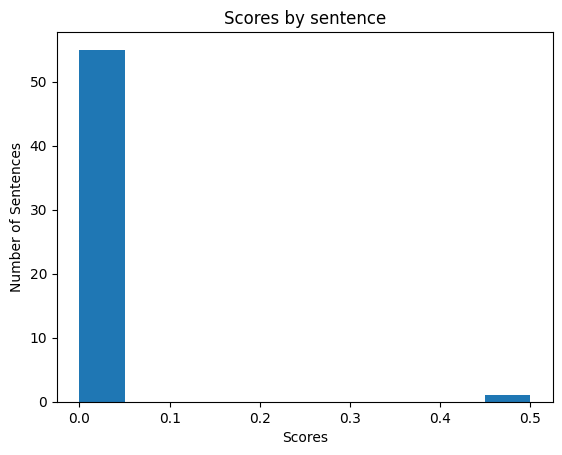

In [ ]:
# Doc from question 3
sentences = list(doc.sents)
tokens_to_look_for = ['Think','Headlights','Car']
list_of_scores = []
for s in sentences:
    # Sentences
    sent_str = str(s).replace('\n','').replace('  ',' ')
    # Score sentences
    scores = score_sentence_by_token(sent_str, tokens_to_look_for)
    # print(f"Sentence {c}: {sum(scores.values())}")
    list_of_scores.append(sum(scores.values()))
# print(list_of_scores)
# Histogram (x-axis is scores and y-axis is # of sents)
plt.hist(list_of_scores)
plt.title("Scores by sentence")
plt.xlabel("Scores")
plt.ylabel("Number of Sentences")
plt.show()

###################################################
# Most common scores seem to be between 0 and 0.05
# Not very high
###################################################

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

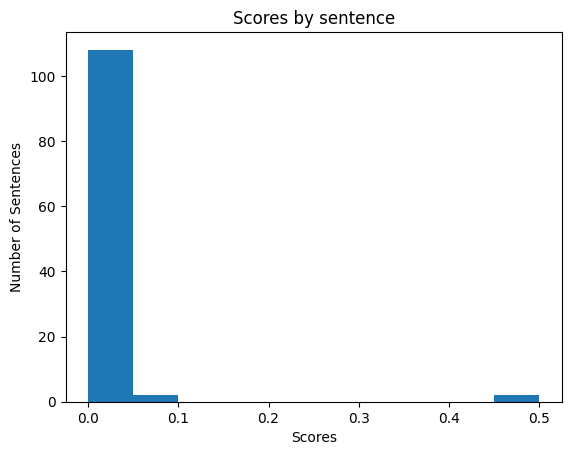

In [76]:
for s in sentences:
    # Sentences
    sent_str = str(s).replace("\n", "").replace("  ", " ")
    # Score sentences
    scores = score_sentence_by_lemma(sent_str, tokens_to_look_for)
    # print(f"Sentence {c}: {sum(scores.values())}")
    list_of_scores.append(sum(scores.values()))
# print(list_of_scores)
# Histogram (x-axis is scores and y-axis is # of sents)
plt.hist(list_of_scores)
plt.title("Scores by sentence")
plt.xlabel("Scores")
plt.ylabel("Number of Sentences")
plt.show()

########################################################
# Slightly higher scores but mostly the same for lemmas
########################################################

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).